Шаг 1. Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/games.csv. Скачать датасет

Шаг 2. Подготовьте данные
Замените названия столбцов (приведите к нижнему регистру);
Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Шаг 3. Проведите исследовательский анализ данных
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах.
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Шаг 5. Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:

Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.
Шаг 6. Напишите общий вывод
Описание данных
Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы проданных копий)
EU_sales — продажи в Европе (миллионы проданных копий)
JP_sales — продажи в Японии (миллионы проданных копий)
Other_sales — продажи в других странах (миллионы проданных копий)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

Шаг 1. Откройте файлы с данными и изучите общую информацию.

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [139]:
data=pd.read_csv('/datasets/games.csv')

In [140]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# Шаг 2. Подготовка данных.

# Заменяем названия столбцов (приводим к нижнему регистру)

In [141]:
data.columns = map(str.lower, data.columns)

In [142]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


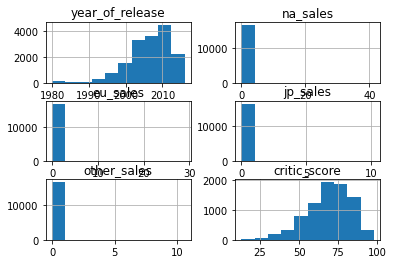

In [143]:
data.hist();

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Проверим так же данные на явные дубликаты

In [146]:
data.duplicated().sum()

0

Дубликаты не обнаружены, проверим еще по двум столбцам, наименование и платформы.

In [147]:
data[data.duplicated(subset=['name','platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


Обнаружены дубликаты для 5-ти строках. Одна игра выпускалась на 2х платформах. Но на одной платформе она продавалась в 2005 г. И в выборку для анализа она не попадает. Оставляем как есть. проверим еще уникальные значения. Так же в последствии уйдут игры с пропусками и 1993 года выпуска

In [148]:
display(data['year_of_release'].unique())
display(data['genre'].unique())
display(data['critic_score'].unique())
display(data['user_score'].unique())
display(data['rating'].unique())

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В столбце rating есть два значения 'K-A' и 'E10+' - это два значения носящие один и тот же смысл (первоначально "K-A" ("Kids to Adults"), потом было переименовано на E10+), поэтому переименовываем 'K-A' в 'E10+', т.к. это более свежее наименоание для удобного и более точного анализа в дальнейшем.

In [149]:
def replace_wrong_ratings(wrong_ratings, correct_rating):
    data['rating'] = data['rating'].replace(wrong_ratings, correct_rating)
replace_wrong_ratings('K-A', 'E10+')
data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1423
EC         8
RP         3
AO         1
Name: rating, dtype: int64

# Преобразовываем данные в нужные типы.

Из информации по датасету видно, что есть пропуски в колонке year_of_release. Из 289 штук, что не так много, чтобы повлиять на анализ, поэтому удаляем

In [150]:
data.dropna(subset = ['year_of_release'], inplace = True)

In [151]:
data['year_of_release']=data['year_of_release'].astype('int')

Произвела замену данных для колонки год, т.к. года это целое число. 

To Be Determined, то есть "Будет определено"При замене типа данных из object на float, выдал ошибку, что в столбце есть данные tbd. tbd поисковик выдает To Be Determined, то есть "Будет определено". Меняем на NaN. Так же меняем данные на float

In [152]:
data.loc[data['user_score']=="tbd", 'user_score']=np.nan
data['user_score'] = data['user_score'].astype(float)

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [154]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


# Обработка пропусков

# Столбец 'name'

In [155]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропусков всего 2 на весь датасет, поэтому удаляем

In [156]:
data.dropna(subset=['name'], inplace=True)

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Проверим все столбцы

# Столбец 'platform'

In [158]:
data.query('platform.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Пропуски отсутствуют

# Столбец 'year_of_release'

In [159]:
data.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Пропуски отсутствуют

# Столбец 'genre'

In [160]:
data.query('genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Пропуски отсутствуют

# Столбец 'na_sales'

In [161]:
data.query('na_sales.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Пропуски отсутствуют

# Столбец 'eu_sales'

In [162]:
data.query('eu_sales.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Пропуски отсутсвуют

# Столбец 'jp_sales'

In [163]:
data.query('jp_sales.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Пропуски отсутсвуют

# Столбец 'other_sales'

In [164]:
data.query('other_sales.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Пропуски отсутсвуют

# Столбец 'critic_score' 

In [166]:
data.query('critic_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


в столбцах critic_score довольно много значений  Причиной отсутствия рейтинга может быть просто отсутствие оценок (неоцененные игры) или же игры были недавнего вышедшие и еще не получили свои оценки.

# Столбец 'user_score'

In [167]:
data.query('user_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


в столбцах user_score тоже довольно много значений. Причиной отсутствия рейтинга идентичны с критиками, может быть просто отсутствие оценок (неоцененные игры) 
или же игры были недавнего вышедшие и еще не получили свои оценки.

Заеняем пропуски в данных столбцах на отрицательны значения. В дальнейшем откорректируем их по необходимости.

In [168]:
data.loc[data['critic_score'].isna(), 'critic_score'] = -1
data.loc[data['user_score'].isna(), 'user_score'] = -1

Из-за этого у меня не принимал проект, предущий ревьюер

# Столбец 'rating'

In [169]:
data.query('rating.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1.0,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,NaN


In [170]:
data.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NaN


В начале вывода списка игр выделяется что игру Super Mario выпускают разные платформы. Поэтому встречаются одинаковые имена, а игра одна и таже - значит и возрастной рейтинг должен быть один и тот же. Составим словарь имя-рейтинг name_rating и заполним в соостветствии с ним пропуски в столбце rating.

In [171]:
name_rating = data.set_index("name")['rating'].dropna().to_dict()
def rat(st):
    if pd.isna(st['rating']):
        return name_rating.get(st['name'])
    return st['rating']

data['rating'] = data.apply(rat, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           10185 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [172]:
data.loc[data['rating'].isna(), 'rating'] = -1

Таким методом заполнили в колонке rating 3509 пропусков. 

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Заполнилось не так много пропусков.

# Суммируем продажи по всем регионам

In [174]:
data['sum_sale']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-1,31.38


Вывод

На стадии подготовки данных нам необходимо подготовить данные для последующего исследования. Для корректной работы изменили  регистра в названии столбцов с помощью метода str.lower().
Далее проверили пропуски во всех столбцах на наличие некорректных значений в ячейка. Помимо пустых ячеек NaN были обнаружены и другие значения. В столбце user_score обнаружено значение tbd.Так же при вызове функции info() и обратили внимание, что формат ячейки в столбце user_score - object. Хотя  в столбце рейтинг описывается числовым значением с максимальным уровнем - 10. Изменили на float. Для замены данные на float Поэтому предлагаю считать данное значение (tbd) пустым и изменить на NaN. Значение в столбце user_score скорректировано и далее уже будем работать со значением NaN. В столбце rating есть два значения 'K-A' и 'E10+' - это два значения носящие один и тот же смысл (первоначально "K-A" ("Kids to Adults"), потом было переименовано на E10+), поэтому предлагаю переименовать 'K-A' в 'E10+' для удобного и более точного анализа в дальнейшем.

В столбцах user_score и rating изменяем значения с помощью функций. Так же было принять решение изменить наименование платформ для более комфортного понимания платформ, о которых идет речь.

Следующей стадией будет обработка пропусков. Выяснить какие именно значения у нас пропущены и какое количество поможет метод isna().sum()

В 5 столбцах есть пустые ячейки. 

столбец name отвечает за название компьютерной игры. В данном столбуе удалили по пропускам 2 строки. Пропуск в данном столбце объясняется тем, что прри формировании данных могли забыть вбить название.

в столбцах critic_score, user_score довольно много значений и поэтому мы рассчитаем присвоили значение -1 по пустым показателям, т.к. пропуски могут повлиять на дальнейшую аналитику. Причиной отсутствия рейтинга может быть просто отсутствие оценок (неоцененные игры) или же игры были недавнего вышедшие и еще не получили свои оценки.

в столбце year_of_release есть не много пропусков, вычислять по названию игры, если там есть год, очень трудоемкий процесс, поэтому предлагаю удалить пропуска, чтобы не было нелогичного установления года выпуска. Пропуск в данном столбце мог возникнуть из-за того, что при заполнении данных об игре забыли указать или точная дата выхода игры точно не определена.

пустые значения столбца rating были заполнены с помощью дополнительного словаря имя-рейтинг name_rating и заполнили в соостветствии с ним пропуски в столбце rating.


И напоследок выведем отдельный столбец с суммарным количеством продаж по всем регионам.



# Шаг 3. Проведение исследовательского анализа данных 

# Количество игр выпускаемые в разные годы.

In [175]:
year_release_count=data.groupby('year_of_release')['name'].count().reset_index()
year_release_count.columns = ['year', 'quantity']
year_release_count

,year,quantity
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Text(0, 0.5, 'количество игр за год')

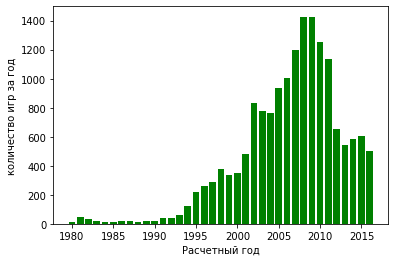

In [176]:
plt.bar(year_release_count['year'], year_release_count['quantity'], color='g');
plt.xlabel('Расчетный год')    
plt.ylabel('количество игр за год')

Для оценки эффективности можно брать период с 1995 года, с момента распространения компьютеров и компьютерных игр.

# Определение платформ с наибольшими суммарными продажами.

In [178]:
platform_max=data.groupby('platform')['sum_sale'].sum().sort_values().reset_index()
platform_max

,platform,sum_sale
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


In [179]:
top_platform=platform_max.loc[17:30, 'platform'].values
top_platform

array(['NES', 'XB', 'GB', 'PC', '3DS', 'PSP', 'GBA', 'PS4', 'PS', 'DS',
       'Wii', 'PS3', 'X360', 'PS2'], dtype=object)

Сформировали список с наибольшими суммарными продажами. Из данной выгрузки мы можем выделить три игровые платформы с наибольшими суммарными продажами. Это - X360, PS2, PS3

# Распределение продаж по годам

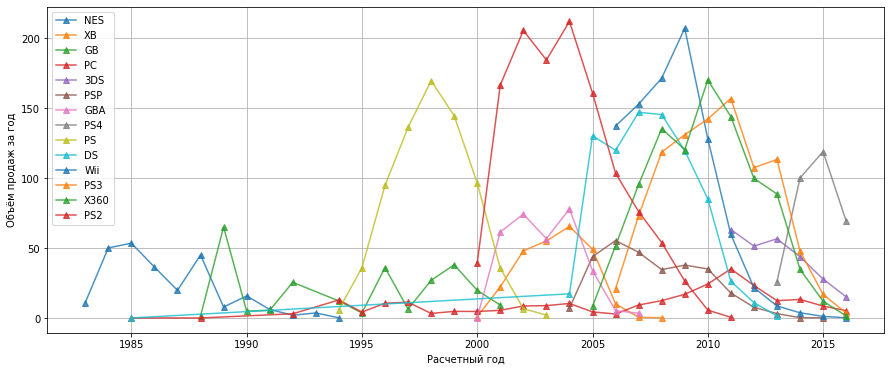

In [180]:
plt.figure(figsize=(15, 6))
plt.grid()
mean_year_life = 0
for i in range(0,len(top_platform)):
    platform  = data.query('platform == @top_platform[@i]').groupby('year_of_release')['sum_sale'].sum()
    mean_year_life += platform.count()
    platform.plot(x=platform.index, y=platform.values, style='-^', \
                  label=top_platform[i], alpha=0.8, grid=True);
plt.xlabel('Расчетный год')    
plt.ylabel('Объём продаж за год')
plt.legend()
plt.show();

Подсчитаем срок жизни платформы вручную - расчетное значение

In [181]:
mean_year_life/len(top_platform)

11.214285714285714

Средний срок выпуска новых плтворм 11,2 года. Характерные пики наблюдаются у PS. 
Производитель по факту один, но каждая версия достигает своей популярности и идет на спад после выпуска новой версии платформы. В дальнейшем для анализа есть смысл брать так же отдельно 2016 год

# Прогноз на 2017 год

Так как на графике распределение продаж с 1980 г., ативные изменения фиксируются с 2005 г, есть смысл взять для прогноза года с 2012 по 2016

Стоим сводную таблицу по наиболее популярным платформам.

In [182]:
platform2017 = data.pivot_table(index='year_of_release', columns='platform', values='sum_sale', aggfunc='sum').\
    query('year_of_release>2011').fillna(0).reset_index()
platform2017['year_of_release'] = platform2017['year_of_release'].astype('Int64')

for column in platform2017.columns:
    if platform2017[column].sum()==0:
        platform2017.drop(column, axis=1,inplace=True)
platform2017

platform,year_of_release,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2012,51.36,11.01,23.22,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00
1,2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2,2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
3,2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
4,2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


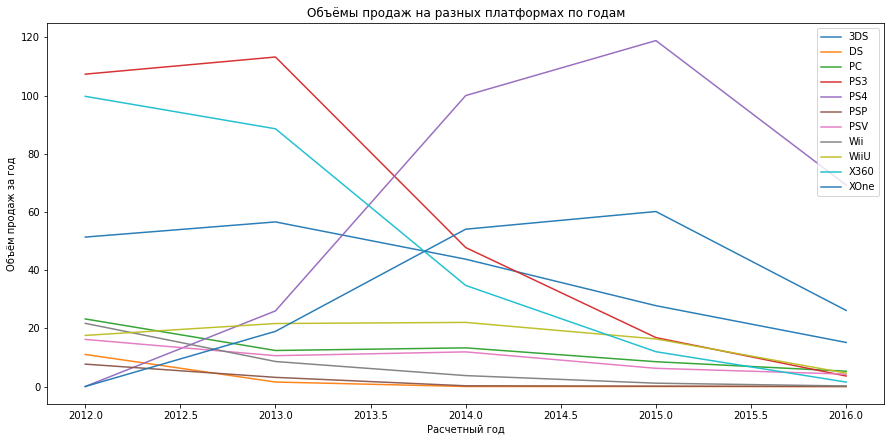

In [183]:
plt.figure(figsize=(15, 7))
plt.grid()
plt.title('Объёмы продаж на разных платформах по годам')

i=0
for column in platform2017.columns[1:]:
    plt.plot(platform2017['year_of_release'].to_list(), platform2017[column].to_list(), label=column, alpha=0.95);
    i+=1 

plt.grid()
plt.xlabel('Расчетный год')    
plt.ylabel('Объём продаж за год')
plt.legend()
plt.show();

Из графика видно что такие как: Wii, PS3, X360, PSP, - прошли свой цикл развития 10-12 лет, и как раз в районе текущего 2016 года завершающий аккорд (другие платформы PS2, DS, GBA, XB, закончилиь еще раньще) - во все эти платформы вкладываться не стоит их развитие закончилось.

Появились две платформы PS4 и XOne, которые появились относительно недавно в 2013 году и уже завоевали потребителя в 2014 и 2015 рост, а в 2016 был спад; их жизненный цикл еше не дошёл даже до середины, поэтому будет логично воспользоваться спадом и развивать эти , на данный момент самые перспективные, платформы!


Флагманами являются - PS4 и XOne! PCV, WiiU и 3DS - тоже можно продолжать развивать, но в меньших объемах(PSV - развитие идет слабо, поэтому приоритет у WiiU и 3DS); платформа PC - актуальна всегда(но в малых объемах), поэтому надо поддерживать её развитие

# Лидеры продаж

In [184]:
top5=['PS4', 'XOne','3DC','PC', 'WiiU']
top5

['PS4', 'XOne', '3DC', 'PC', 'WiiU']

Лидерами продаж на 2017 год можно выделить следующие платформы:'PS4', 'XOne', '3DC', 'PC', 'WiiU'

# Глобальные продажи игр в разбивке по платформам

Построим график ящик с усами

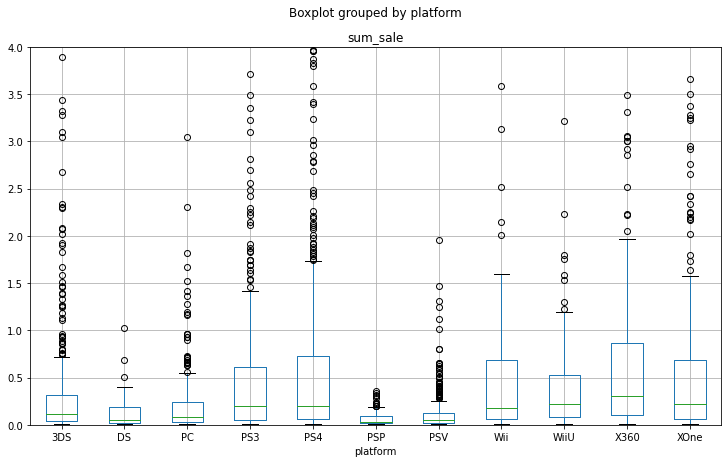

In [185]:
data.query('year_of_release>2011').boxplot(column='sum_sale', by='platform', figsize=(12,7))
plt.ylim(0, 4)
plt.show()

Продажи на популярных платформах схожи. Медианные значения продаж у четырех X360, XOne, PS3,PS4, WiiU находятся близко к уровню 0.2. Выбрсы тут скорее всего продажи игр, которые показали большие продажи на этих платформах

# Продажи внутри одной популярной платформы и отзывы и соотношение с другими платформами

In [186]:
data.query('year_of_release>2011').groupby('platform')['sum_sale'].sum().sort_values(ascending=False).reset_index().head(10)

,platform,sum_sale
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


Рассмотрим самую популярную платформу за период 2012-2016 гг.

In [187]:
one_pl = data.query('year_of_release >= 2012' and 'platform=="PS4"')[['sum_sale', 'user_score']].dropna().reset_index(drop=True)
one_pl

,sum_sale,user_score
0,14.63,-1.0
1,12.62,8.3
2,8.58,4.3
3,7.98,-1.0
4,7.66,5.7
...,...,...
387,0.01,7.5
388,0.01,-1.0
389,0.01,7.9
390,0.01,5.5


In [188]:
one_pl[one_pl['user_score']!=-1].corr()

,sum_sale,user_score
sum_sale,1.000000,-0.031957
user_score,-0.031957,1.000000


In [189]:
one_pl_crit = data.query('year_of_release >= 2012' and 'platform=="PS4"')[['sum_sale', 'critic_score']].dropna().reset_index(drop=True)
one_pl_crit

,sum_sale,critic_score
0,14.63,-1.0
1,12.62,97.0
2,8.58,82.0
3,7.98,-1.0
4,7.66,83.0
...,...,...
387,0.01,69.0
388,0.01,-1.0
389,0.01,61.0
390,0.01,51.0


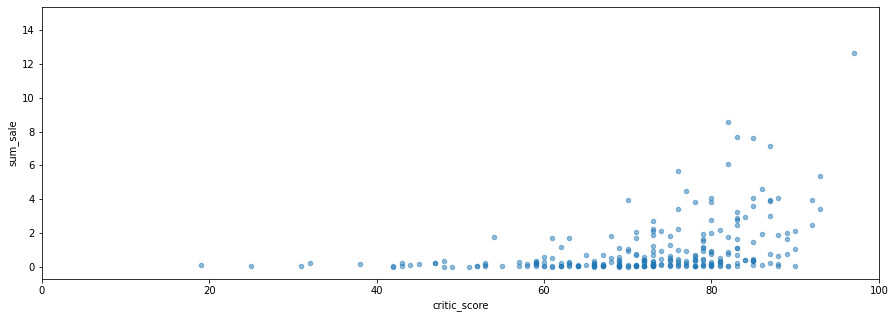

In [190]:
one_pl_crit.plot(x='critic_score',y='sum_sale',kind='scatter',figsize=(15,5), alpha=0.5, xlim=(0,100));

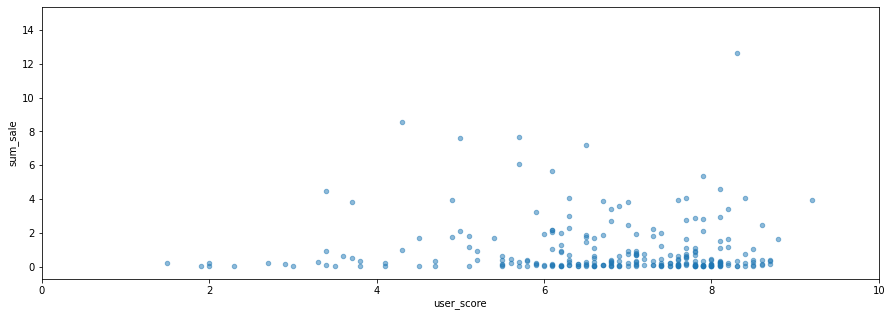

In [191]:
one_pl.plot(x='user_score',y='sum_sale',kind='scatter',figsize=(15,5), alpha=0.5, xlim=(0,10));

In [192]:
one_pl_crit[one_pl_crit['critic_score']!=-1].corr()

,sum_sale,critic_score
sum_sale,1.000000,0.406568
critic_score,0.406568,1.000000


Построим график распределения по годам с 2012 по 2016 (актуальный период)

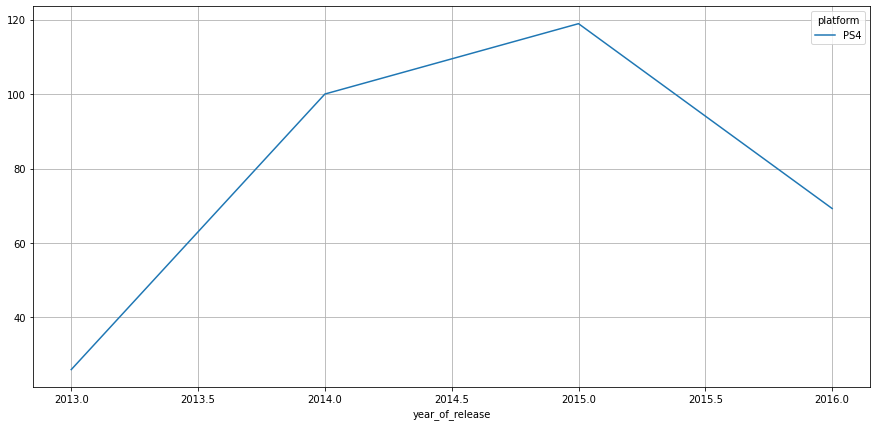

In [193]:
ps4 = data.query("platform == ['PS4'] and year_of_release >= 2012")
ps4.pivot_table(index='year_of_release', columns = 'platform', values='sum_sale', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.show()

По платформе PS4: Отзывы критиков важны, хотя зависимость продаж от них находится на уровне средней. И зависимость продаж от отзывов пользователей, как выясняется близкая к нулю, т.е. отутствует.

Создадим словарь sal_scor - Платформа:DataFrame (с продажами и отзывами)*

In [194]:
top2012 = data.query('year_of_release>=2012').groupby('platform')['sum_sale'].sum().sort_values(ascending=False).reset_index().head(10)
top2012

,platform,sum_sale
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


In [195]:
top5 = top2012.head()
top5

,platform,sum_sale
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32


# PS 3

Оценка пользователей 

In [196]:
one_pl_PS3 = data.query('year_of_release >= 2012' and 'platform=="PS3"')[['sum_sale', 'user_score']].dropna().reset_index(drop=True)
one_pl_PS3

,sum_sale,user_score
0,21.05,8.2
1,13.79,5.3
2,13.33,3.2
3,12.63,6.4
4,10.70,7.5
...,...,...
1301,0.01,-1.0
1302,0.01,-1.0
1303,0.00,-1.0
1304,0.01,-1.0


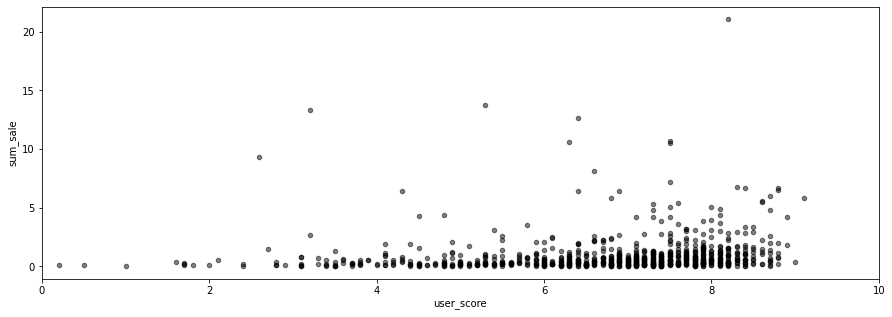

In [197]:
one_pl_PS3.plot(x='user_score',y='sum_sale',kind='scatter',figsize=(15,5), alpha=0.5, color='black', xlim=(0,10));

In [198]:
one_pl_PS3[one_pl_PS3['user_score']!=-1].corr()

,sum_sale,user_score
sum_sale,1.000000,0.128416
user_score,0.128416,1.000000


Зависимость продаж PS3 от отзывов пользователей-отсутсвует.

Оценка критиков 

In [199]:
one_pl_PS3_c = data.query('year_of_release >= 2012' and 'platform=="PS3"')[['sum_sale', 'critic_score']].dropna().reset_index(drop=True)
one_pl_PS3_c 

,sum_sale,critic_score
0,21.05,97.0
1,13.79,83.0
2,13.33,88.0
3,12.63,88.0
4,10.70,84.0
...,...,...
1301,0.01,-1.0
1302,0.01,-1.0
1303,0.00,-1.0
1304,0.01,-1.0


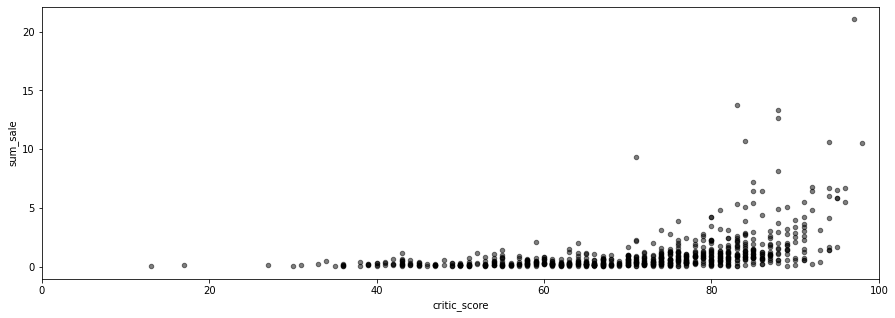

In [200]:
one_pl_PS3_c.plot(x='critic_score',y='sum_sale',kind='scatter',figsize=(15,5), alpha=0.5, color='black', xlim=(0,100));

In [201]:
one_pl_PS3_c[one_pl_PS3_c['critic_score']!=-1].corr()

,sum_sale,critic_score
sum_sale,1.000000,0.432759
critic_score,0.432759,1.000000


зависимость продаж от оценки критиков - на границе со слабой. Зависимость от мнения пользователей отсутствует

# Х360

Оценка пользователей

In [202]:
one_pl_X360 = data.query('year_of_release >= 2012' and 'platform=="X360"')[['sum_sale', 'user_score']].dropna().reset_index(drop=True)
one_pl_X360

,sum_sale,user_score
0,21.82,6.3
1,16.27,8.1
2,14.73,3.4
3,14.62,6.3
4,13.68,4.8
...,...,...
1227,0.01,2.1
1228,0.01,-1.0
1229,0.01,-1.0
1230,0.01,5.1


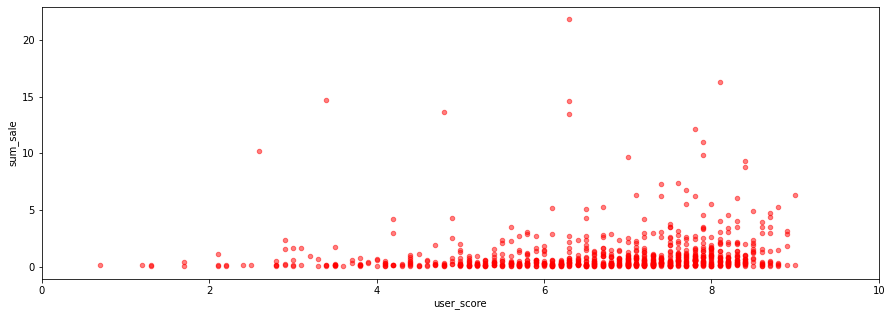

In [203]:
one_pl_X360.plot(x='user_score',y='sum_sale',kind='scatter',figsize=(15,5), alpha=0.5, color='red', xlim=(0,10));

In [204]:
one_pl_X360[one_pl_X360['user_score']!=-1].corr()

,sum_sale,user_score
sum_sale,1.000000,0.114187
user_score,0.114187,1.000000


Зависимость продаж X360 от отзывов пользователей- близится к 0, т.е. отсутсвует.

Оценка критиков

In [205]:
one_pl_X360_c = data.query('year_of_release >= 2012' and 'platform=="X360"')[['sum_sale', 'critic_score']].dropna().reset_index(drop=True)
one_pl_X360_c 

,sum_sale,critic_score
0,21.82,61.0
1,16.27,97.0
2,14.73,88.0
3,14.62,87.0
4,13.68,83.0
...,...,...
1227,0.01,49.0
1228,0.01,-1.0
1229,0.01,-1.0
1230,0.01,-1.0


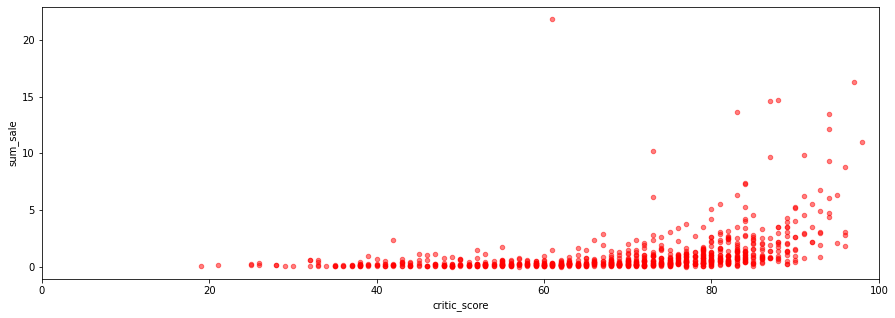

In [206]:
one_pl_X360_c.plot(x='critic_score',y='sum_sale',kind='scatter',figsize=(15,5), alpha=0.5, color='red', xlim=(0,100));

In [207]:
one_pl_X360_c[one_pl_X360_c['critic_score']!=-1].corr()

,sum_sale,critic_score
sum_sale,1.000000,0.392866
critic_score,0.392866,1.000000


зависимость продаж от оценки критиков находится на уровне средней, но ближе к слабой. Зависимость от оценки пользователей - отсутсвует

# XOne

Оценка пользователей

In [208]:
one_pl_XOne= data.query('year_of_release >= 2012' and 'platform=="XOne"')[['sum_sale', 'user_score']].dropna().reset_index(drop=True)
one_pl_XOne

,sum_sale,user_score
0,7.39,-1.0
1,5.47,7.9
2,5.26,5.4
3,4.49,6.4
4,4.22,6.2
...,...,...
242,0.01,8.2
243,0.01,6.6
244,0.01,-1.0
245,0.01,6.7


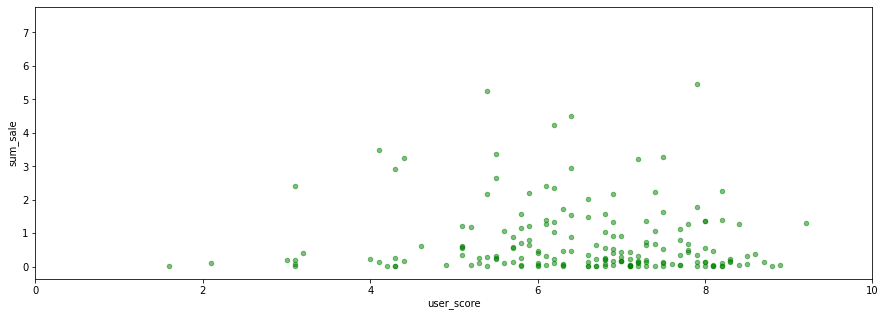

In [209]:
one_pl_XOne.plot(x='user_score',y='sum_sale',kind='scatter',figsize=(15,5), alpha=0.5, color='green', xlim=(0,10));

In [210]:
one_pl_XOne[one_pl_XOne['user_score']!=-1].corr()

,sum_sale,user_score
sum_sale,1.000000,-0.068925
user_score,-0.068925,1.000000


Зависимость продаж XOne от отзывов пользователей- отсутсвует.

Оценка критиков

In [211]:
one_pl_XOne_c = data.query('year_of_release >= 2012' and 'platform=="XOne"')[['sum_sale', 'critic_score']].dropna().reset_index(drop=True)
one_pl_XOne_c 

,sum_sale,critic_score
0,7.39,-1.0
1,5.47,97.0
2,5.26,81.0
3,4.49,84.0
4,4.22,88.0
...,...,...
242,0.01,63.0
243,0.01,-1.0
244,0.01,-1.0
245,0.01,74.0


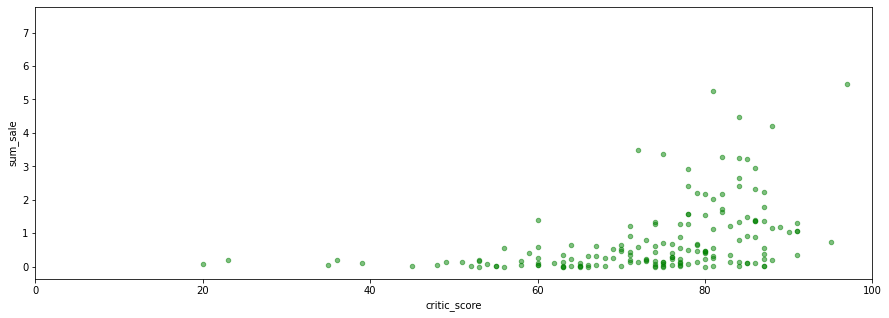

In [212]:
one_pl_XOne_c.plot(x='critic_score',y='sum_sale',kind='scatter',figsize=(15,5), alpha=0.5, color='green', xlim=(0,100));

In [213]:
one_pl_XOne_c[one_pl_XOne_c['critic_score']!=-1].corr()

,sum_sale,critic_score
sum_sale,1.000000,0.416998
critic_score,0.416998,1.000000


зависимость продаж от отзывов критиков находится на среднем уровне. 

# 3DS

Оценка пользователей

In [214]:
one_pl_3DS=data.query('year_of_release >= 2012' and 'platform=="3DS"')[['sum_sale', 'user_score']].dropna().reset_index(drop=True)
one_pl_3DS

,sum_sale,user_score
0,14.60,-1.0
1,12.65,8.2
2,11.68,-1.0
3,10.81,8.4
4,9.90,7.2
...,...,...
507,0.01,-1.0
508,0.01,-1.0
509,0.01,-1.0
510,0.01,-1.0


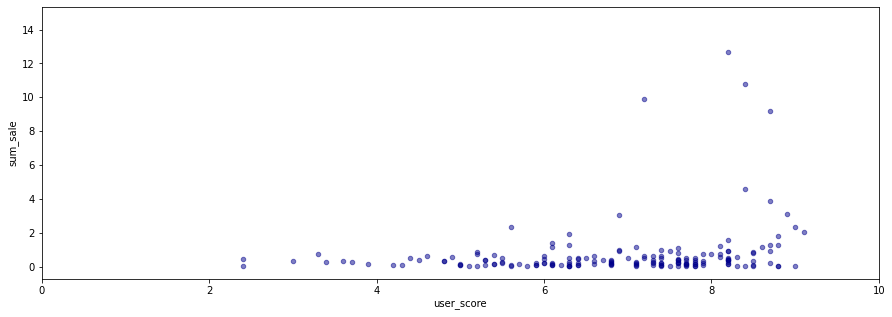

In [215]:
one_pl_3DS.plot(x='user_score',y='sum_sale',kind='scatter',figsize=(15,5), alpha=0.5, color='DarkBlue', xlim=(0,10));

In [216]:
one_pl_3DS[one_pl_3DS['user_score']!=-1].corr()

,sum_sale,user_score
sum_sale,1.000000,0.222078
user_score,0.222078,1.000000


зависимость продаж от пользователей находится на слабом уровне

Оценка критиков

In [217]:
one_pl_3DS_c = data.query('year_of_release >= 2012' and 'platform=="3DS"')[['sum_sale', 'critic_score']].dropna().reset_index(drop=True)
one_pl_3DS_c 

,sum_sale,critic_score
0,14.60,-1.0
1,12.65,85.0
2,11.68,-1.0
3,10.81,90.0
4,9.90,78.0
...,...,...
507,0.01,-1.0
508,0.01,-1.0
509,0.01,-1.0
510,0.01,-1.0


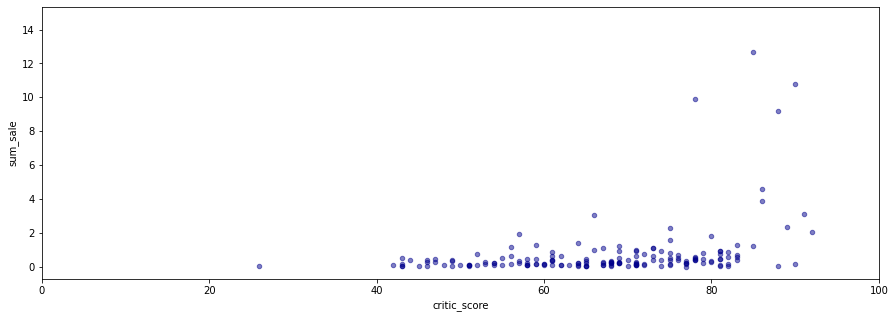

In [218]:
one_pl_3DS_c.plot(x='critic_score',y='sum_sale',kind='scatter',figsize=(15,5), alpha=0.5, color='DarkBlue', xlim=(0,100));

In [219]:
one_pl_3DS_c[one_pl_3DS_c['critic_score']!=-1].corr()

,sum_sale,critic_score
sum_sale,1.00000,0.34874
critic_score,0.34874,1.00000


зависимость продаж от критиков находится на уровне средней

Схожие тенденции имеют место почти для всех платформ, кроме 3DS. Зависимость продаж:

от отзывов критиков слабая но ближе к средней
от отзывов пользователей значительно отсутсвует, за исключение 3DS

Примерно на среднем уровне продаж от отзывов пользователей и критиков находится платформа 3DS. 

На продажи PS4, PS3, XOne отзывы пользователей не влияют.

# Соотношение с другими платформами

In [220]:
data.query('year_of_release >= 2012').groupby('platform')['sum_sale'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,493.0,0.585781,1.462855,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


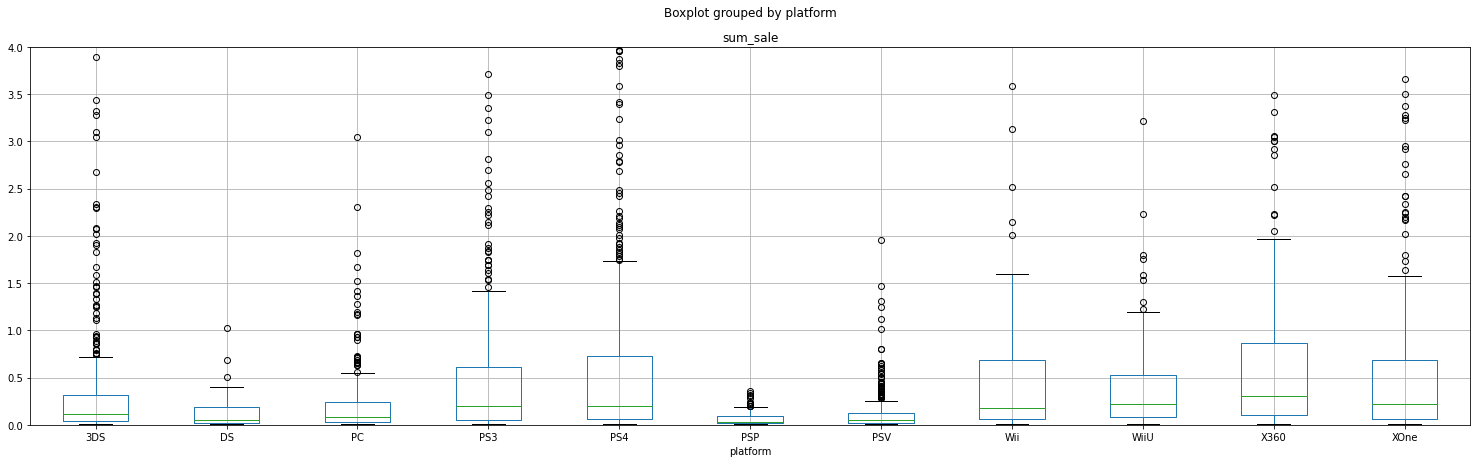

In [221]:
data.query('year_of_release >= 2012').boxplot(column='sum_sale', by='platform', figsize=(25,7))
plt.ylim(0, 4)
plt.show()

Можем выделить несколько платформ, которые выделяются: PS3,X360, 3DS, PS4 и WiiU. Границы этих платформ высокие, но при всем при этом медиана у всех платформне выходит за рамки 0.5 млн продаж, т.к. медиана и размах примерно на одном уровне, можно сказать, что у наших платформ, в отличии от тех, которые не попали в выборку есть намного больше игр, которые покупались намного чаще.

Посмотрим общее распределение игр по жанрам.

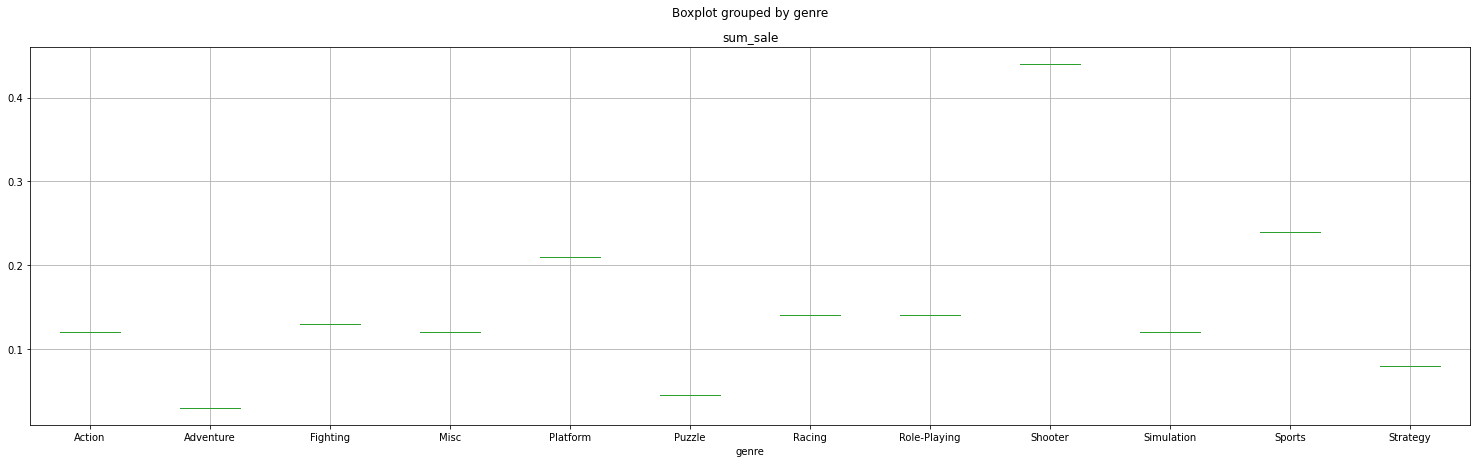

In [222]:
data.query('year_of_release >= 2012').pivot_table(index='genre', values='sum_sale', aggfunc='median').boxplot(column='sum_sale', by='genre', figsize=(25,7));

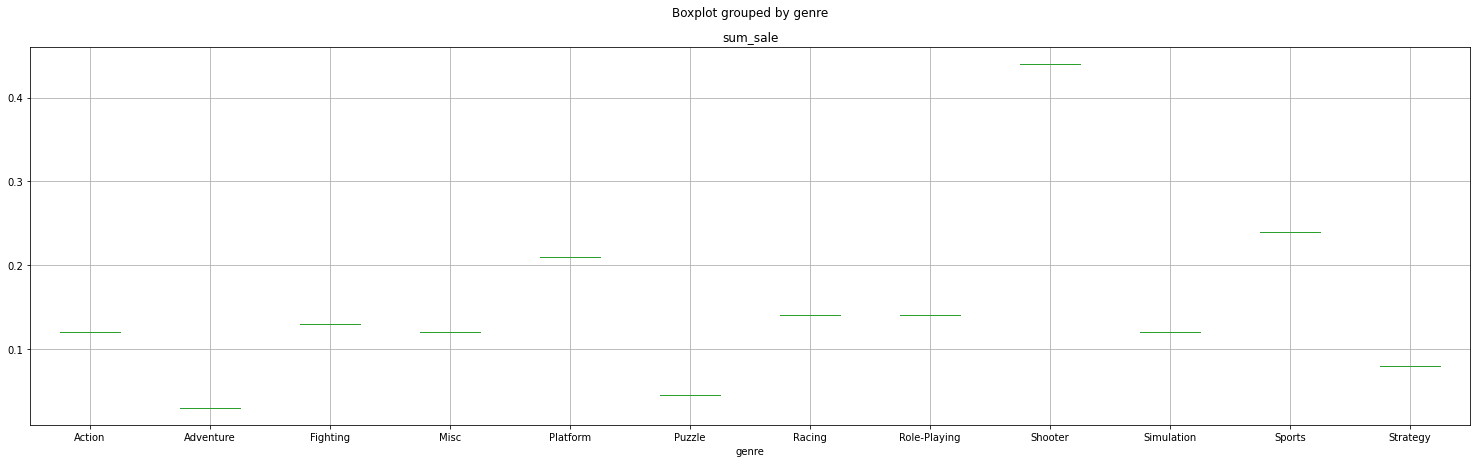

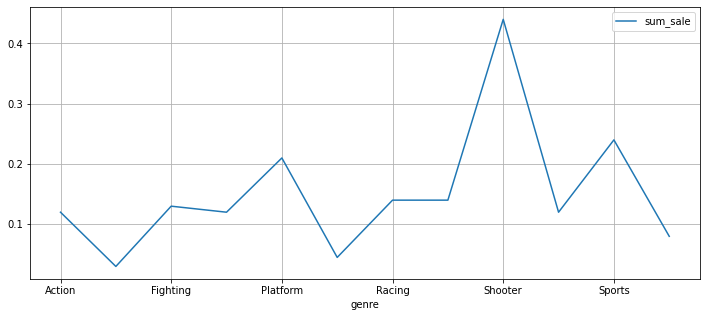

In [223]:
(
data.query('year_of_release >= 2012').pivot_table(index='genre', values='sum_sale', aggfunc='median')
.boxplot(column='sum_sale', by='genre', figsize=(25,7))
)
plt.show()
(
data.query('year_of_release >= 2012').pivot_table(index='genre', values='sum_sale', aggfunc='median')
.plot(grid=True, figsize=(12, 5))
)
plt.show()
                                                                

На графике мы можем выделить ТОП-5 жанров:
1. Shooter
2. Sports
3. Platform
4. Racing
5. Role-Playing

ТОП-5 самых непопулярных жанров:
1. Adventure
2. Puzzle
3. Strategy
4. Misc
5. Similatiom

Из этих графиков можно сделать выводы, что за актуальный период ледируют игры жанра Shooter и Sports

# Шаг 4. Портрет пользователя каждого региона

# ТОП - 5 по платформам, жанрам и рейтингу

# Северная америка

# Платформа

In [224]:
sales_na=data.query('year_of_release>=2012').groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()
sales_na.head(10)

,platform,na_sales
0,X360,140.05
1,PS4,108.74
2,PS3,103.38
3,XOne,93.12
4,3DS,55.31
5,WiiU,38.10
6,PC,19.12
7,Wii,17.45
8,PSV,10.98
9,DS,4.59


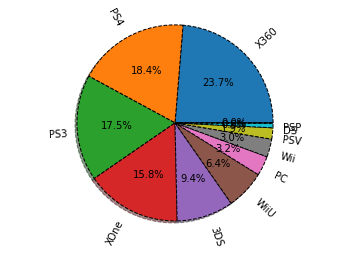

In [225]:
values=sales_na['na_sales']
labels=sales_na['platform']

fig, ax = plt.subplots();
ax.pie(values, labels=labels, autopct='%1.1f%%', shadow=True,  wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True);
ax.axis("equal");
#sales_na.plot(values, labels = labels, kind = 'pie', figsize=(20,8), subplots=True, title = 'ТОП-5 самых популярных платформ в Северной Америке');

В Америке  лидер продаж по платформам Х360 .

# Жанр

In [226]:
genre_na=data.query('year_of_release>=2012').groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index()
genre_na.head(5)

,genre,na_sales
0,Action,177.84
1,Shooter,144.77
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19


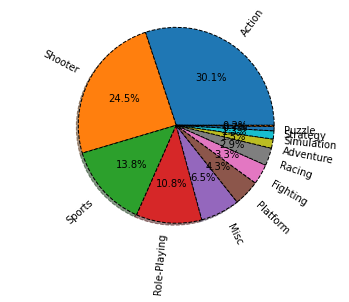

In [227]:
values=genre_na['na_sales']
labels=genre_na['genre']

fig, ax = plt.subplots();
ax.pie(values, labels=labels, autopct='%1.1f%%', shadow=True,  wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True);
ax.axis("equal");

В Америке лидерами являются жанры: Action & Shooter

# Рейтинг

In [228]:
rating_na=data.query('year_of_release>=2012').groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index()
rating_na.head(5)

,rating,na_sales
0,M,239.96
1,E,117.74
2,-1,85.58
3,E10+,77.89
4,T,69.80


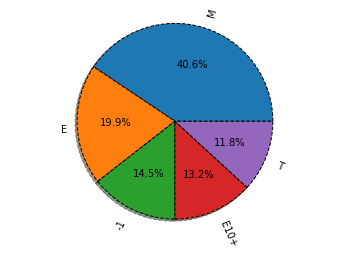

In [229]:
values=rating_na['na_sales']
labels=rating_na['rating']

fig, ax = plt.subplots();
ax.pie(values, labels=labels, autopct='%1.1f%%', shadow=True,  wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True);
ax.axis("equal");

В Америке почти половина проданных игр имеет рейтинг М

Портрет потребителя в Америке:
Предпочитает платформы PS4 и XOne, на которых играть в Action и Shooter , преимущественно рейтинг M.

# Европа

# Платформа

In [230]:
sales_eu=data.query('year_of_release>=2012').groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()
sales_eu.head(5)

,platform,eu_sales
0,PS4,141.09
1,PS3,106.86
2,X360,74.52
3,XOne,51.59
4,3DS,42.64


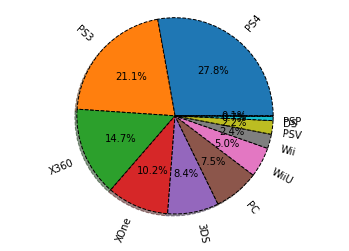

In [231]:
values=sales_eu['eu_sales']
labels=sales_eu['platform']

fig, ax = plt.subplots();
ax.pie(values, labels=labels, autopct='%1.1f%%', shadow=True,  wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True);
ax.axis("equal");

В Европе лидер продаж по платформам PS4.

# Жанр

In [232]:
genre_eu=data.query('year_of_release>=2012').groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()
genre_eu.head(5)

,genre,eu_sales
0,Action,159.34
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29


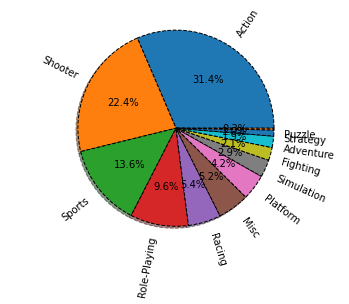

In [233]:
values=genre_eu['eu_sales']
labels=genre_eu['genre']

fig, ax = plt.subplots();
ax.pie(values, labels=labels, autopct='%1.1f%%', shadow=True,  wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True);
ax.axis("equal");

В Европе лидер продаж по жанрам с Action.

# Рейтинг

In [234]:
rating_eu=data.query('year_of_release>=2012').groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index()
rating_eu.head(5)

,rating,eu_sales
0,M,202.99
1,E,115.35
2,-1,73.47
3,E10+,57.97
4,T,57.04


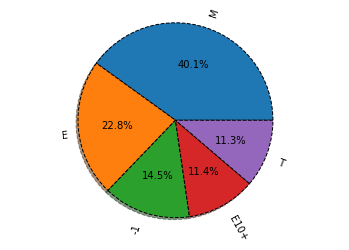

In [235]:
values=rating_eu['eu_sales']
labels=rating_eu['rating']

fig, ax = plt.subplots();
ax.pie(values, labels=labels, autopct='%1.1f%%', shadow=True,  wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True);
ax.axis("equal");

В Европе преобладает рейтинг М

Портрет потребителя в Европе на 2016 год следующий :
Предпочитает платформы PS4, на которых играть в Shooter и Action, преимущественно рейтинг M для взрослых.

# Япония

# Платформа

In [236]:
sales_jp=data.query('year_of_release>=2012').groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()
sales_jp.head(5)

,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01


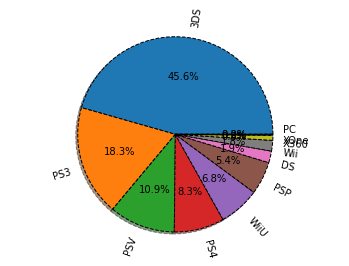

In [237]:
values=sales_jp['jp_sales']
labels=sales_jp['platform']

fig, ax = plt.subplots();
ax.pie(values, labels=labels, autopct='%1.1f%%', shadow=True,  wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True);
ax.axis("equal");

В Японии лидер продаж по платформам 3DS.

# Жанр

In [238]:
genre_jp=data.query('year_of_release>=2012').groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()
genre_jp.head(5)

,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44


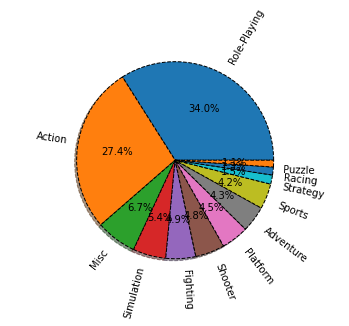

In [239]:
values=genre_jp['jp_sales']
labels=genre_jp['genre']

fig, ax = plt.subplots();
ax.pie(values, labels=labels, autopct='%1.1f%%', shadow=True,  wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True);
ax.axis("equal");

В Японии  лидер продаж по жанрам Role-Playing.

 # Рейтинг

In [240]:
rating_jp=data.query('year_of_release>=2012').groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index()
rating_jp.head(5)

,rating,jp_sales
0,-1,103.41
1,E,29.27
2,T,29.13
3,M,22.20
4,E10+,8.57


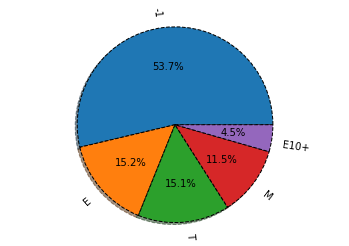

In [241]:
values=rating_jp['jp_sales']
labels=rating_jp['rating']

fig, ax = plt.subplots();
ax.pie(values, labels=labels, autopct='%1.1f%%', shadow=True,  wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True);
ax.axis("equal");

В Японии в преобладают игры без рейтинга далее рейтинг E для всех

Портрет потребителя в Японии:
Предпочитает платформы 3DS, на которых играть в Role-Playing, преимущественно без рейтинга. Игры без рейтинга покупаются, потому что Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Соответственно японцы предпочитают плаформу 3DS и игры на нее соответствеено Японского производств. Отсюда такой большой % без рейтинга

# Остальные

# Платформа 

In [242]:
sales_other=data.query('year_of_release>=2012').groupby('platform')['other_sales'].sum().sort_values(ascending=False).reset_index()
sales_other.head(5)

,platform,other_sales
0,PS4,48.35
1,PS3,43.26
2,X360,20.40
3,XOne,14.27
4,3DS,8.87


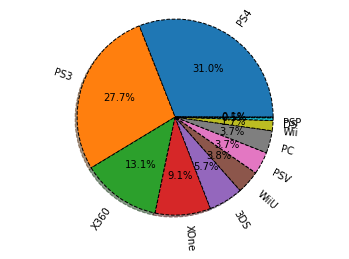

In [243]:
values=sales_other['other_sales']
labels=sales_other['platform']

fig, ax = plt.subplots();
ax.pie(values, labels=labels, autopct='%1.1f%%', shadow=True,  wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True);
ax.axis("equal");

В остальных регионах лидер продаж по платформам PS4. 

# Жанр

In [244]:
genre_other=data.query('year_of_release>=2012').groupby('genre')['other_sales'].sum().sort_values(ascending=False).reset_index()
genre_other.head(5)

,genre,other_sales
0,Action,51.14
1,Shooter,37.26
2,Sports,22.44
3,Role-Playing,14.83
4,Misc,7.67


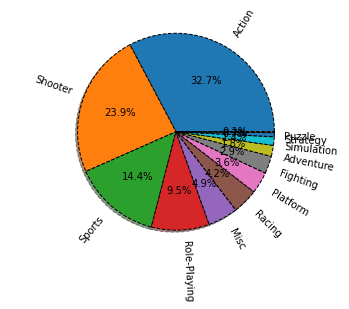

In [245]:
values=genre_other['other_sales']
labels=genre_other['genre']

fig, ax = plt.subplots();
ax.pie(values, labels=labels, autopct='%1.1f%%', shadow=True,  wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True);
ax.axis("equal");

В остальных регионах  лидер продаж по жанрам с Action и  Shooter.

# Рейтинг

In [246]:
rating_other=data.query('year_of_release>=2012').groupby('rating')['other_sales'].sum().sort_values(ascending=False).reset_index()
rating_other.head(5)

,rating,other_sales
0,M,66.28
1,E,32.08
2,-1,21.41
3,T,19.51
4,E10+,16.88


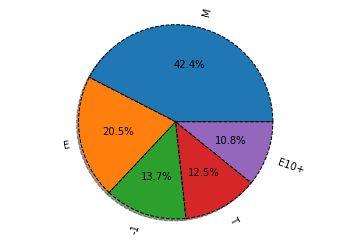

In [247]:
values=rating_other['other_sales']
labels=rating_other['rating']

fig, ax = plt.subplots();
ax.pie(values, labels=labels, autopct='%1.1f%%', shadow=True,  wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True);
ax.axis("equal");

В остальных регионах преобладает рейтинг  М

Портрет потребителя в остальных регионах на 2016 год следующий :
Предпочитает платформы PS4 , на которых играть в Shooter
 и Action, преимущественно рейтинг  М для взрослых.

Выводы: В этой части выделим ТОП-5 самых популярных и непопулярных платформ и жанров.
Можем выделить, что каждый регион не сильно отличается топовыми позициями. Для примера разберем первые места.

По нашей таблице:

Рейтинг по платформам:
в Северной Америке - X360
в Европе - PS4
в Японии - 3DS
в других странах - PS4
В данном рейтинге выделяется только Япония

Рейтинг по жанрам:
в Северной Америке - Action
в Европе - Action
в Японии - Role-Playing
в других странах - Action
В данном рейтинге выделяется тоже только Япония

Рейтинг от организации ESRB:
в Северной Америке - M
в Европе - M
в Японии - без рейтинга
в других странах - M
И опять выделилась Япония.
Отсюда можно сделать вывод, что в Японии есть свои предпочтения связанные сo спецификой страны

# Шаг 5 Проверка гипотезы

Необходимо проверить следующие гипотезы:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

# Проверка гипотезы по рейтингам платформы

Так как H₀ всегда формулируется так, чтобы использовать знак равенства, то нулевую гипотезу сформулируем также (как по заданию): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; альтернативная гипотеза H₁ тогда будет такая - Средние пользовательские рейтинги платформ Xbox One и PC различны.

Принимаем следующие гипотезы для платформ XOne и PC:

Нулевая гипотеза H0: средние рейтинги по платформам одинаковые

Альтернативная гипотеза H1: средние рейтинги по платформам разные

Для проверки гипотезы исполльзуем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.
Для оценки гипотезы использовали t-тест. Так как у нас есть размер выборки из множества данных, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности.Это утверждение верно, даже если сама генеральная совокупность не распределена нормально.

In [248]:
import warnings
warnings.filterwarnings('ignore')
# убираем значения, которые были пропусками
data = data[data['user_score'] != -1]
#вывела две выборки по необходимым платформам
data_xbox = data.query('year_of_release>=2012')[data['platform'] == 'XOne']
data_pc = data.query('year_of_release>=2012')[data['platform'] == 'PC']
#обозначили две выборки конкретных столбцов с пользовательскими рейтингами.
xbox_1 = data_xbox['user_score']
pc_1 = data_pc['user_score']
alpha = .05 # критический уровень статистической значимости
#если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
xbox_1,
pc_1)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Вывод: Не получилось отвергнуть нулевую гипотезу - это значит, что  Средние пользовательские рейтинги платформ Xbox One и PC одинаковы

# Проверка гипотезы по жанрам

Так как H₀ всегда формулируется так, чтобы использовать знак равенства то нулевую гипотезу сформулируем так: Средние пользовательские рейтинги жанров Action и Sports равны; альтернативная гипотеза H₁ тогда будет такая - Средние пользовательские рейтинги жанров Action и Sports разные (как по заданию).

Принимаем следующие гипотезы для жанров Action и Sports:

Нулевая гипотеза H0: средние рейтинги по жанрам одинаковые

Альтернативная гипотеза H1: средние рейтинги по жанрам разные

Для проверки гипотезы исполльзуем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.
Для оценки гипотезы использовали t-тест. Так как у нас есть размер выборки из множества данных, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности.Это утверждение верно, даже если сама генеральная совокупность не распределена нормально.

In [249]:
import warnings
warnings.filterwarnings('ignore')
data = data[data['user_score'] != -1]
data_action = data.query('year_of_release>=2012')[data.query('year_of_release>=2012')['genre'] == 'Action']
data_sports = data.query('year_of_release>=2012')[data.query('year_of_release>=2012')['genre'] == 'Sports']
action_1 = data_action['user_score']
sports_1 = data_sports['user_score']
alpha = 0.05 # критический уровень статистической значимости
#если p-value окажется меньше него - отвегнеIм гипотезу
results = st.ttest_ind(action_1, sports_1)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  3.7163089460934874e-26
Отвергаем нулевую гипотезу


Вывод: Отвергаем нулевую гипотезу - это значит, что а Средние пользовательские рейтинги жанров Action и Sports разные

Обе гипотезы по заданию проверены и доказаны

# Шаг 6 Общий вывод

По итогам можно сделать следующий прогноз на 2017 год в игровой индустрии.

Был анализирован период с 2012 по 2016 года включительно. PS4 и Xbox One, которые на этот момент обладали самыми большими продажами и были в тренде.

Самыми популярной платформой на рынке в мире является - PS4, за исключением Японии тут 3DS.

Жанры игр страны предпочитают в основном - Action, кроме Японии - тут Role-Playing. 

А вот ТОП рейтинг от организации ESRB возглавдяет рейтинг M («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет), за исключением Японии тут без рейтинга или рейтинг Е - для всех.
В 2017 году с большей вероятностью будет иметь популярность PS4 и XOne. Жанровые предопочтения будут на уровне Shooter, Action и Sports. Возраст потребителя старше 17 лет во всем мире. Для Японии стаку по прежнему надо делать на 3DS.
Портрет потребителя можно обозначит, взрослый человек (скорее всего - мужчина, т.к. топ жанров все таки больше мужской) предпочитающий платформу PS4. В Японии же скорее всего будут семьи, которые активно поддерживают производителя из своей страны, что логично и играющие в игры жанра Role-Playing

Для оценки гипотезы использовали t-тест. Так как у нас есть размер выборки из множества данных, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности.Это утверждение верно, даже если сама генеральная совокупность не распределена нормально.

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, не получилось отвергнуть нулевую гипотезу
Средние пользовательские рейтинги жанров Action и Sports разные, отвергаем нулевую гипотезу
Обе гипотезы подтерждены.